In [1]:
import plotly.express as px
import pandas as pd
from pathlib import Path

In [2]:
alleghany = pd.read_csv("alleghany_foreclosures.csv", parse_dates=True, index_col='filing_date', infer_datetime_format=True)

alleghany.head(5)

municipality    amount  \
filing_date                                  
2009-01-02         Tarentum Boro  61821.09   
2009-01-02    Elizabeth Township  24531.41   
2009-01-02   N. Fayette Township  21787.83   
2009-01-02    Elizabeth Township  63072.46   
2009-01-02        Homestead Boro  63693.10   

                                            plaintiff  
filing_date                                            
2009-01-02       Beneficial Consumer Discount Company  
2009-01-02     National City Real Estate Services LLC  
2009-01-02   JPMorgan Chase Bank National Association  
2009-01-02   JPMorgan Chase Bank National Association  
2009-01-02       Deutsche Bank National Trust Company

In [3]:
# Slice the foreclosure data for Series municipality and amount.
# Group data by index.year and municipality, and then perform a count. Hint: This will require a DateTimeIndex.

alleghany_sliced = alleghany[['municipality', 'amount']]
alleghany_sliced.head(5)

municipality    amount
filing_date                               
2009-01-02         Tarentum Boro  61821.09
2009-01-02    Elizabeth Township  24531.41
2009-01-02   N. Fayette Township  21787.83
2009-01-02    Elizabeth Township  63072.46
2009-01-02        Homestead Boro  63693.10

In [11]:
all_reset = alleghany_sliced.groupby([alleghany_sliced.index.year, 'municipality']).count().reset_index()
all_reset.head()

filing_date      municipality  amount
0         2009   Aleppo Township       5
1         2009    Aspinwall Boro       4
2         2009       Avalon Boro      22
3         2009      Baldwin Boro      47
4         2009  Baldwin Township      11

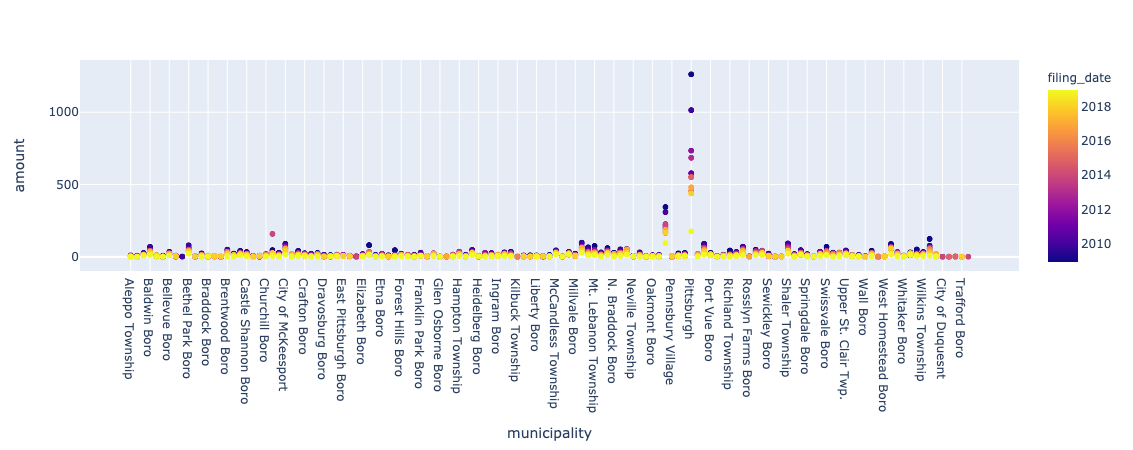

In [37]:
px.scatter(all_reset, x='municipality', y='amount', color='filing_date')

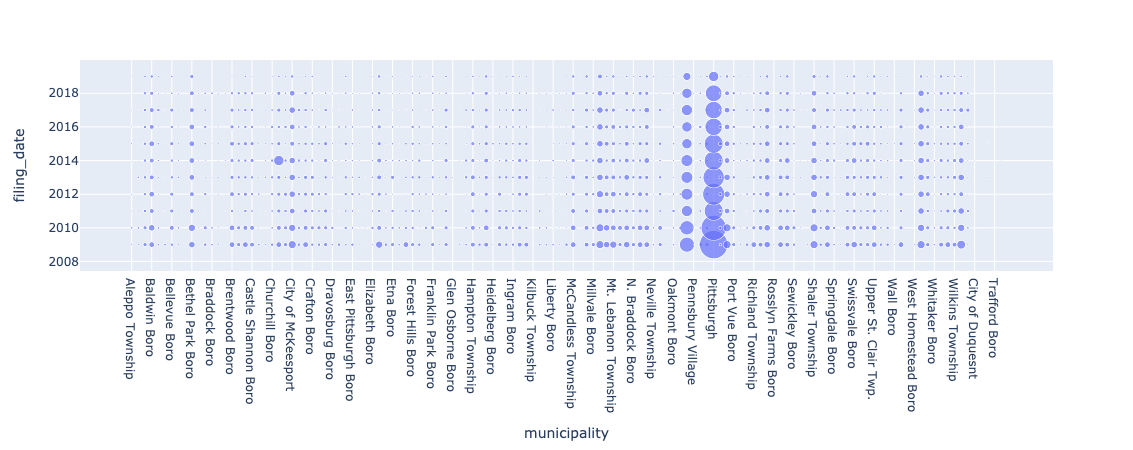

In [5]:
px.scatter(all_reset, x='municipality', y='filing_date', size='amount')

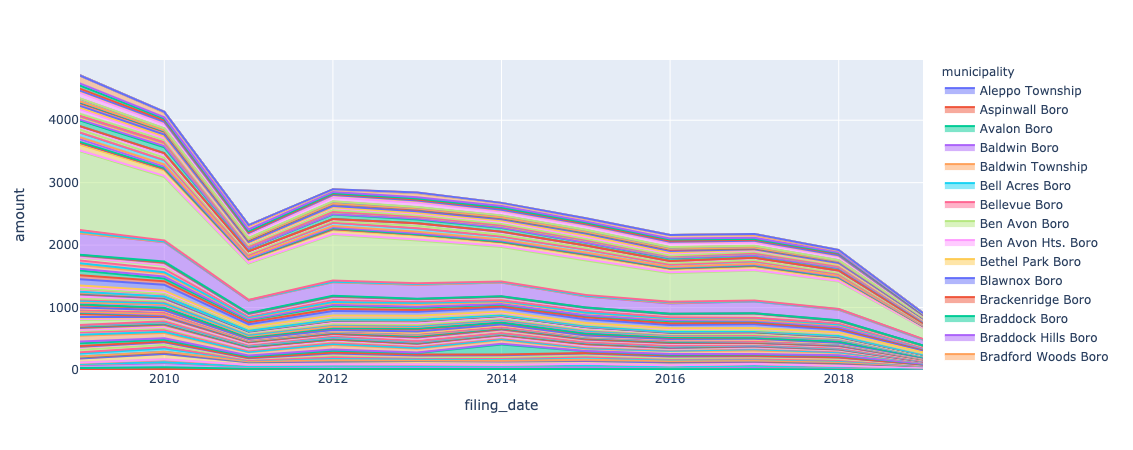

In [7]:
px.area(all_reset, x='filing_date', y='amount', color='municipality', line_group='municipality')

In [13]:
### Parallel Coordinates Plots

# Read in data
sales = pd.read_csv(
    Path("allegheny_sales.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="SALEDATE",
).dropna()

foreclosures = pd.read_csv(
    Path("allegheny_foreclosures.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
).dropna()

# Slice data and get the count of instances by year
foreclosures_grp_cnt = (
    foreclosures[["amount"]].groupby([foreclosures.index.year]).count()
)
sales_grp_cnt = sales[["PRICE"]].groupby([sales.index.year]).count()

# Rename columns to be 'num_sales' and 'num_foreclosures'
sales_grp_cnt.columns = ["num_sales"]
foreclosures_grp_cnt.columns = ["num_foreclosures"]

In [16]:
sales_foreclosures_cnt = pd.concat([sales_grp_cnt, foreclosures_grp_cnt], axis=1, join='inner').dropna().reset_index()
sales_foreclosures_cnt.head(5)

index  num_sales  num_foreclosures
0   2012         85              2893
1   2013         93              2841
2   2014         97              2676
3   2015        108              2431
4   2016        102              2163

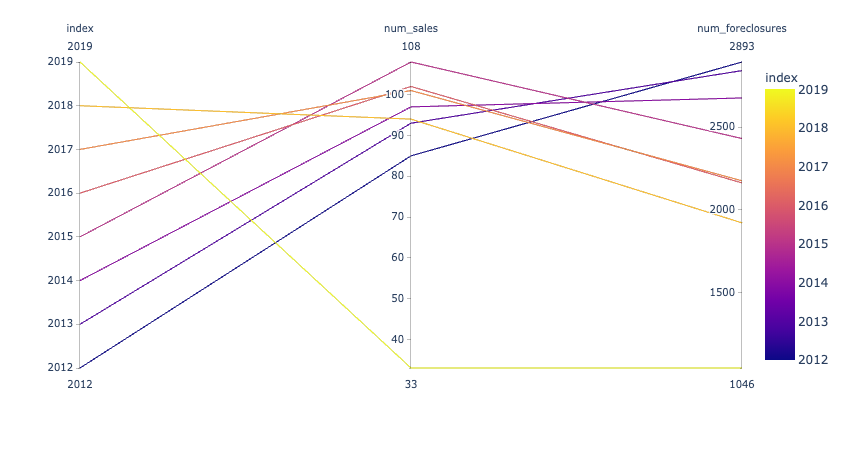

In [19]:
px.parallel_coordinates(sales_foreclosures_cnt, color='index')

In [25]:
# property_df = pd.read_csv('class-solutions/property_assessments.csv')
# property_df.head(5)

prop_assessments = pd.read_csv(
    Path("class-solutions/property_assessments.csv"), 
    index_col="LEGAL2", 
    low_memory=False
).sample(50, replace=True)
prop_assessments.head()

LEGAL1  \
LEGAL2                                                                                             
PARCEL 1-C LOT 25.15X141.11X24.01 OR             PARAGON HOMES INC ON THE MOUNT 1ST REV PLAN       
1-STY BRK V-HSE-GAR 5579                         LOGAN TERR PLAN 13 LOT 65.94X165.16 CLARENCE DR   
EZ ST                                            R COWAN PLAN PT 85 LOT 20.55X165X20.84 RR NATCH   
PENNA AVE                                        WHIGHAM HTS PLAN 171 LOT 41.98XAVG153.95X40 RR    
E                                                SUNSET HILLS 3RD PLAN 531 LOT 50X120 AUDUBON AV   

                                                                                          LEGAL3  \
LEGAL2                                                                                             
PARCEL 1-C LOT 25.15X141.11X24.01 OR             .080 ALD GRANDVEIW AVENUE                         
1-STY BRK V-HSE-GAR 5579                                                                     NaN   
EZ ST                                            2 STY BRK HSE 122                                 
PENNA AVE                                        2 STY FRA & SHG HSE 199                           
E                                                                      2 STY BRK V HSE & GAR 610   

                                                NEIGHCODE TAXCODE  \
LEGAL2                                                              
PARCEL 1-C LOT 25.15X141.11X24.01 OR                11901       T   
1-STY BRK V-HSE-GAR 5579                            87603       T   
EZ ST                                               11905       T   
PENNA AVE                                           20001       T   
E                                                   92607       T   

                                                      TAXDESC  \
LEGAL2                                                          
PARCEL 1-C LOT 25.15X141.11X24.01 OR             20 - Taxable   
1-STY BRK V-HSE-GAR 5579                         20 - Taxable   
EZ ST                                            20 - Taxable   
PENNA AVE                                        20 - Taxable   
E                                                20 - Taxable   

                                                              OWNERDESC CLASS  \
LEGAL2                                                                          
PARCEL 1-C LOT 25.15X141.11X24.01 OR                            REGULAR     R   
1-STY BRK V-HSE-GAR 5579                         REGULAR-ETUX OR ET VIR     R   
EZ ST                                                           REGULAR     R   
PENNA AVE                                        REGULAR-ETUX OR ET VIR     R   
E                                                               REGULAR     R   

                                                   CLASSDESC  USECODE  \
LEGAL2                                                                  
PARCEL 1-C LOT 25.15X141.11X24.01 OR             RESIDENTIAL       60   
1-STY BRK V-HSE-GAR 5579                         RESIDENTIAL       10   
EZ ST                                            RESIDENTIAL       10   
PENNA AVE                                        RESIDENTIAL       10   
E                                                RESIDENTIAL       10   

                                                       USEDESC  ...  \
LEGAL2                                                          ...   
PARCEL 1-C LOT 25.15X141.11X24.01 OR                 TOWNHOUSE  ...   
1-STY BRK V-HSE-GAR 5579                         SINGLE FAMILY  ...   
EZ ST                                            SINGLE FAMILY  ...   
PENNA AVE                                        SINGLE FAMILY  ...   
E                                                SINGLE FAMILY  ...   

                                                 CONDITION CONDITIONDESC  \
LEGAL2                                                                     
PARCEL 1-C LOT 25.

In [50]:
prop_sliced = prop_assessments[ ['LOCALTOTAL', 'USEDESC', 'TOTALROOMS', 'BEDROOMS', 'FULLBATHS'] ]
# prop_sliced.head(5)
prop_sliced = prop_sliced.sort_values(by=['TOTALROOMS', 'BEDROOMS', 'FULLBATHS'])

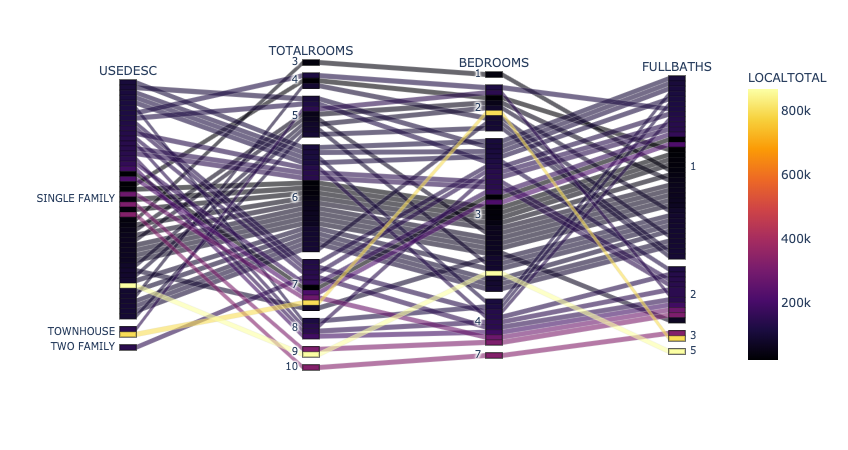

In [51]:
### Parallel Categories Plots
px.parallel_categories(prop_sliced, dimensions=['USEDESC', 'TOTALROOMS', 'BEDROOMS', 'FULLBATHS'], 
                      color='LOCALTOTAL', 
                      color_continuous_scale=px.colors.sequential.Inferno)

In [30]:
# Sort the plot so that BEDROOMS**, **TOTALROOMS, and FULLBATHS are sorted in ascending order.
# TO BE DONE

In [31]:
# MAPBOX

import os
from dotenv import load_dotenv
load_dotenv()

True

In [35]:
mapbox_api = os.getenv('MAPBOX_API_KEY')
type(mapbox_api)
px.set_mapbox_access_token(mapbox_api)

In [36]:
places_of_interest = pd.read_csv(
    Path("nyc_places_interest.csv")
).dropna()
places_of_interest.head()

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

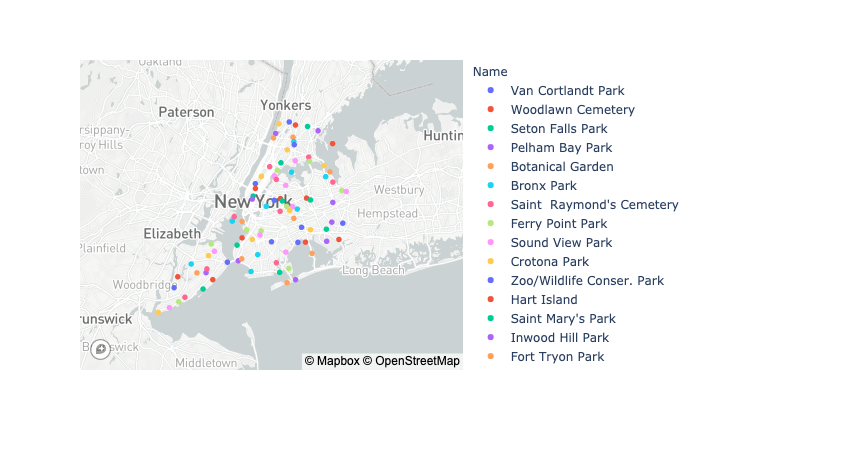

In [38]:
# Slice and plot data by name
map1 = px.scatter_mapbox(places_of_interest, lat='Latitude', lon='Longitude', color='Name', zoom=8)
map1.show()

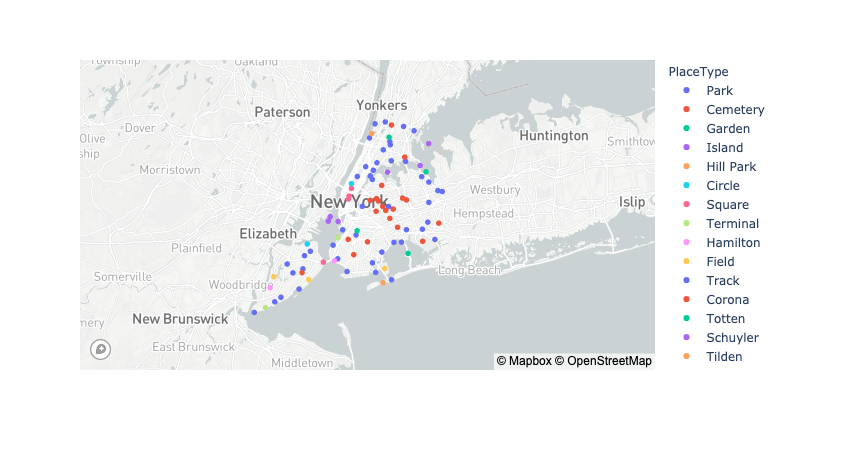

In [40]:
# Slice and plot data by place type
map2 = px.scatter_mapbox(places_of_interest, lat='Latitude', lon='Longitude', color='PlaceType', zoom=8)
map2.show()

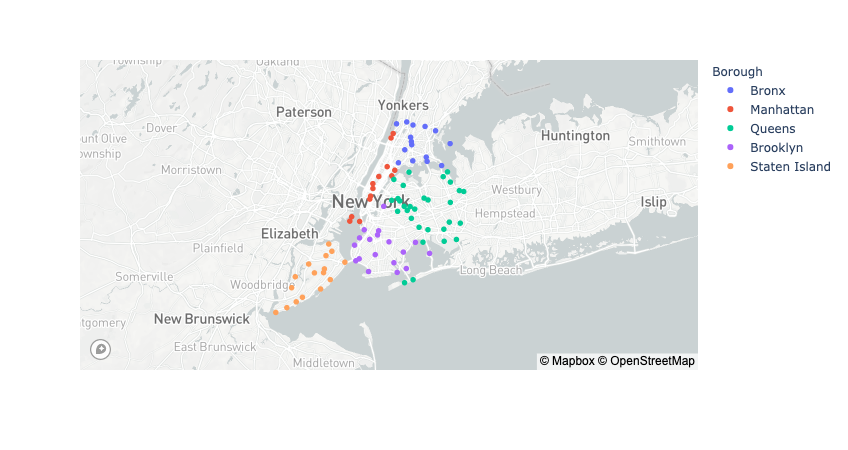

In [41]:
# Slice and plot data by borough 
map3 = px.scatter_mapbox(places_of_interest, lat='Latitude', lon='Longitude', color='Borough', zoom=8)
map3.show()

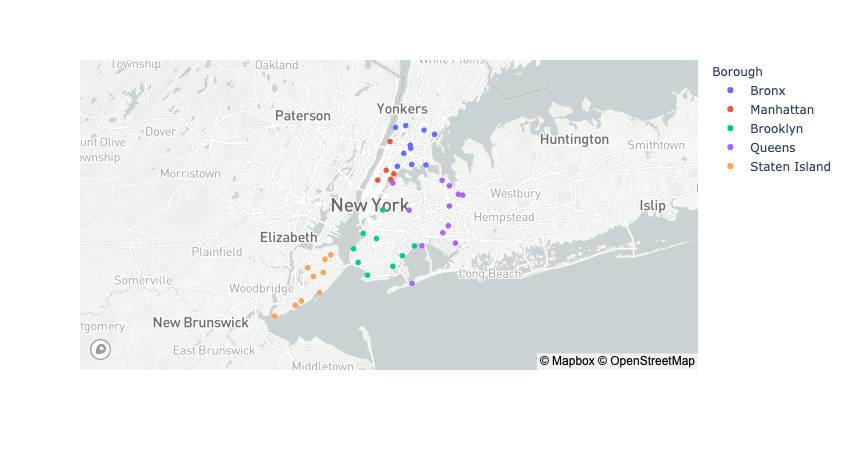

In [44]:
# Slice and plot data by place type of park 
filtered_park = places_of_interest[places_of_interest['PlaceType'] == 'Park']
map4 = px.scatter_mapbox(filtered_park, lat='Latitude', lon='Longitude', color='Borough', zoom=8)
map4.show()

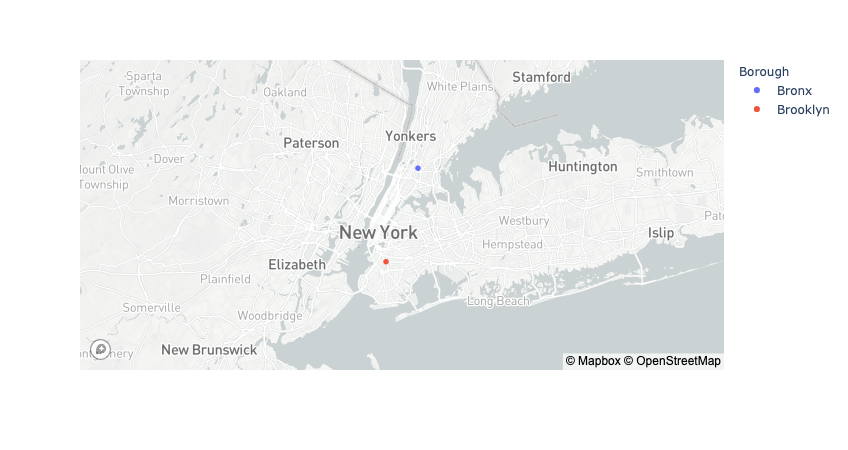

In [67]:
# Slice and plot data by place type of garden 
filtered_garden = places_of_interest[places_of_interest['PlaceType'] == 'Garden']
map5 = px.scatter_mapbox(filtered_garden, lat='Latitude', lon='Longitude', color='Borough', zoom=8)
map5.show()

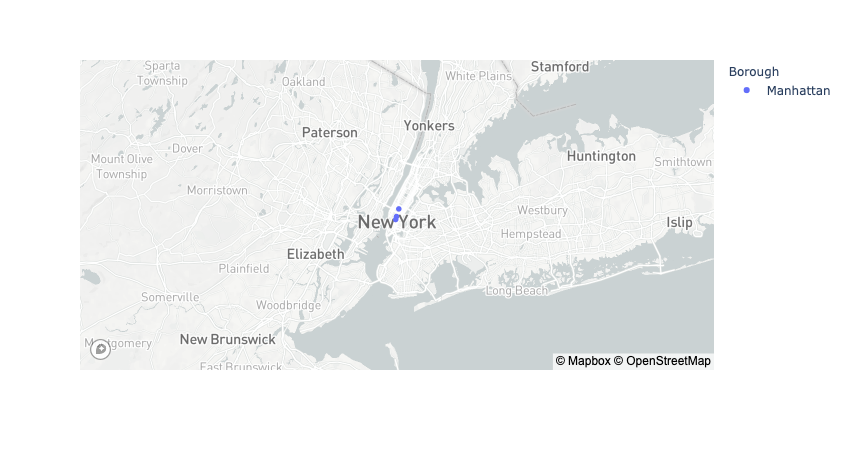

In [47]:
# Slice and plot data by place type of square 
filtered_square = places_of_interest[places_of_interest['PlaceType'] == 'Square']
map6 = px.scatter_mapbox(filtered_square, lat='Latitude', lon='Longitude', color='Borough', zoom=8)
map6.show()

In [54]:
bday_places = pd.read_csv(Path('harold_bday_plans.csv')).dropna()
bday_places.head(5)

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

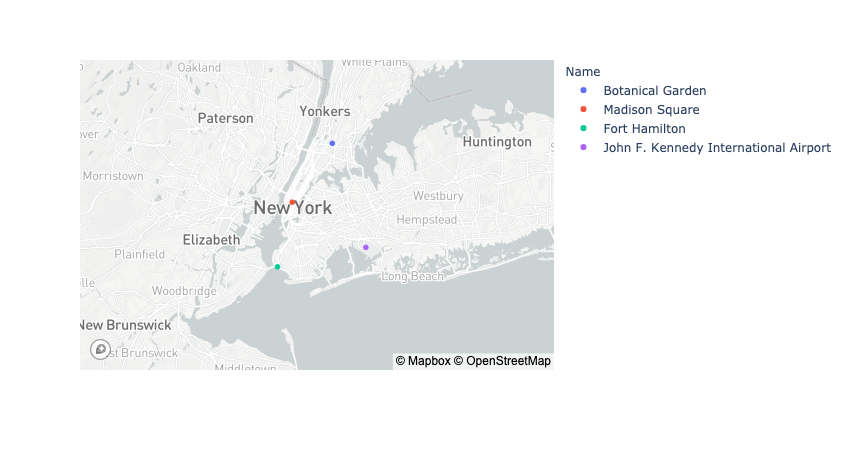

In [72]:
# Slice data for your arriving airport and the first location the group will visit.

arriving_airport = bday_places[bday_places['PlaceType'] == 'International Airport']
# first = filtered_square[filtered_square['Borough'] == 'Manhattan'].iloc[0]
# second = filtered_square[filtered_square['Borough'] == 'Manhattan'].iloc[1]
# route = pd.concat()


route = bday_places[ bday_places['Name'].str.contains('Airport') | 
                    bday_places['Name'].isin(['Botanical Garden', 'Madison Square', 'Fort Hamilton'])
]

map_route = px.scatter_mapbox(route, lat='Latitude', lon='Longitude', color='Name', zoom=8)
map_route.show()